## Importing Libraries & Dataset



In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
df=tf.keras.datasets.mnist

In [ ]:
df

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(X_train, y_train), (X_test, y_test) = df.load_data()

In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9]

## Exploring data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_test.shape

(10000, 28, 28)

## Pre-processing data

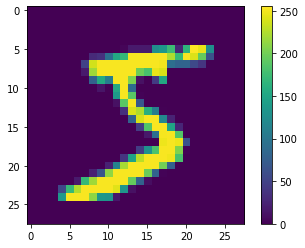

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We divide X_train by 255 because pixel value ranges from 0-256 and apart from zero, the range is 255.

This is done for scaling.

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

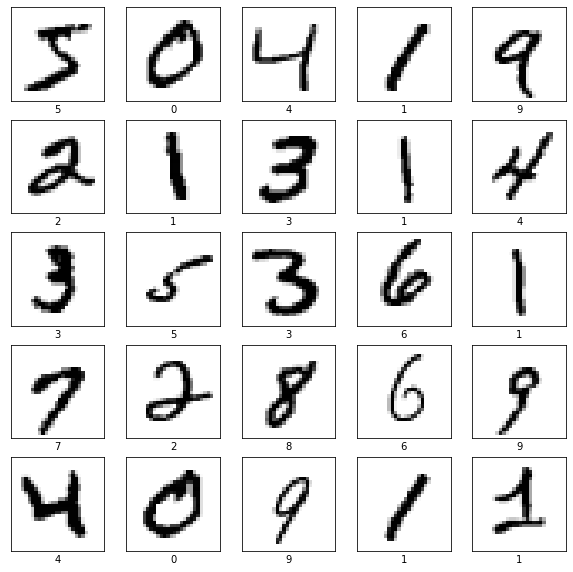

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Building the model

### Setting up the layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Flatten layer converts all the image data to 1-d array

First dense layer generates 128 neurons.

The second dense layer takes input from the first dense layer and converts them into 10 logits

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

The logits from the last code are passed through the loss function.

We want to minimize the loss function.

Optimizer updates weights according toh the output from the loss function.

## Training the model

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2594 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1145 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0774 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0457 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0363 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0200 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

## Evaluating Accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0742 - accuracy: 0.9800 - 1s/epoch - 4ms/step

Test accuracy: 0.9800000190734863


## Predicting

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


## Checking predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

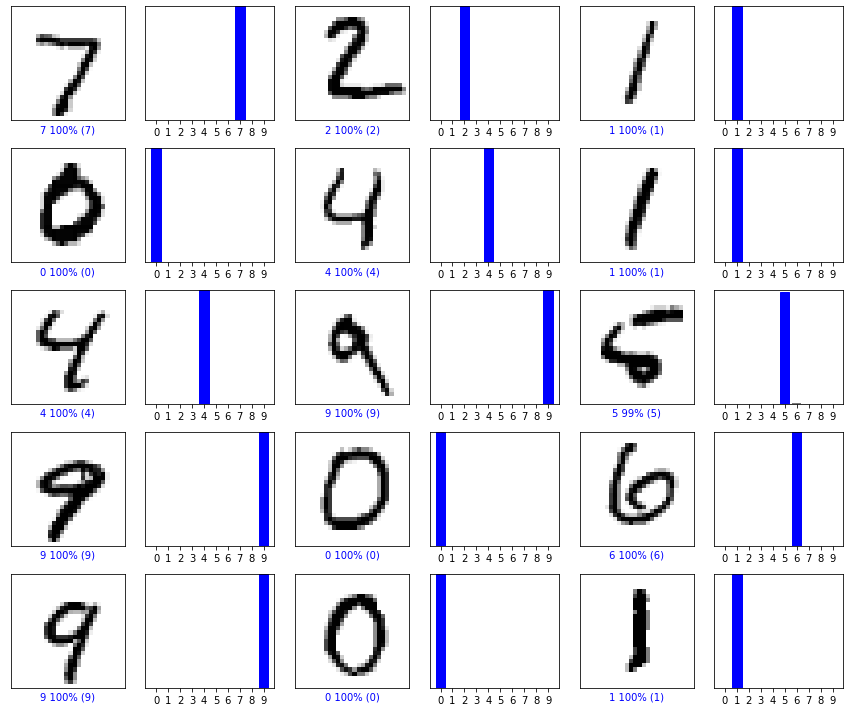

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()